In [24]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##### Steps
1. load data
2. Preprocessing
3. model selection and fit
4. measure performance
5. reiterate to upgrade

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)

In [3]:
X.shape, y.shape

((442, 10), (442,))

In [4]:
# check for nans
X[np.isnan(X)]

array([], dtype=float64)

In [5]:
is_nan = np.isnan(X)
print('nans: ', X[is_nan])
# # if there existed any nans, then we could make them 0:
# X_copy = X.copy()
# X_copy[is_nan] == 0.

nans:  []


In [6]:
X.mean(axis = 0), X.std(axis = 0)

(array([-1.44429466e-18,  2.54321451e-18, -2.25592546e-16, -4.85408596e-17,
        -1.42859580e-17,  3.89881064e-17, -6.02836031e-18, -1.78809958e-17,
         9.24348582e-17,  1.35176953e-17]),
 array([0.04756515, 0.04756515, 0.04756515, 0.04756515, 0.04756515,
        0.04756515, 0.04756515, 0.04756515, 0.04756515, 0.04756515]))

For this case it is okay that `mean` of all features = 0 and all features have about same `std`. We could skip any scaling. But for sake of good practices - lets do `StandardScaler`


In [7]:
scaler = StandardScaler()
scaler.fit(X)
X_tr  = scaler.transform(X)

# now check
X_tr.mean(axis = 0), X_tr.std(axis = 0)

(array([-8.03781375e-18,  1.22074296e-16,  6.53072367e-18, -1.14538846e-16,
         5.52599696e-18, -6.53072367e-18, -1.10519939e-17,  1.27349112e-16,
         8.60297253e-18, -7.20577444e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

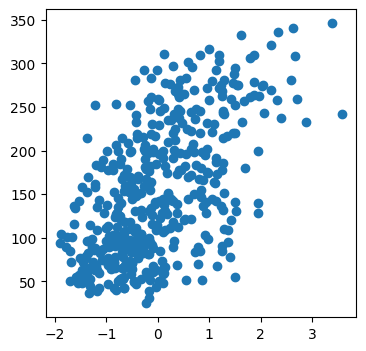

In [8]:
#Let's take 3rd feature only - single variable
XX = X_tr[:, 2, None]
plt.figure(figsize = (4,4))
plt.scatter(XX, y)
plt.show()

default score (method call):  0.3439237602253802
r2_score from metrics:  0.3439237602253802
coefs:  [45.16003002]
intercept:  152.13348416289594


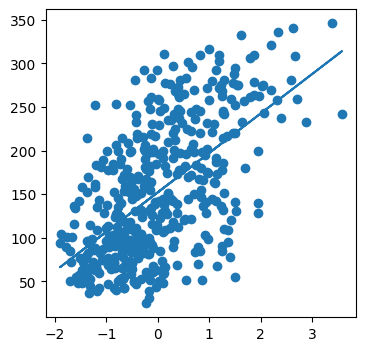

In [14]:
lr = LinearRegression(fit_intercept=True) # because we are not making a col of 1 by ourselves
lr.fit(XX,y)
print('default score (method call): ', lr.score(XX,y))
y_preds = lr.predict(XX)
print('r2_score from metrics: ', r2_score(y, y_preds))
print('coefs: ', lr.coef_)
print('intercept: ', lr.intercept_)

plt.figure(figsize = (4,4))
plt.scatter(XX, y)
plt.plot(XX,y_preds)
plt.show()

Another good practise is to perform `train_test_split` to prevent overfitting. Let's do that

Train R2 score :  0.35570788926676766
Val R2 score :  0.31643968376857334
coefs:  [46.27500532]
intercept:  150.26267496245103


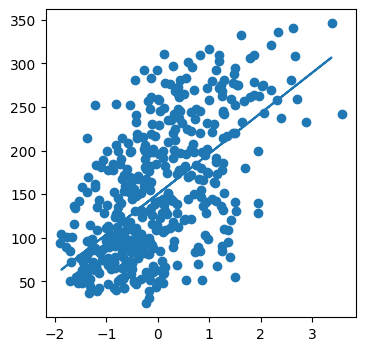

In [15]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.33, random_state=42)
lr = LinearRegression(fit_intercept=True) # because we are not making a col of 1 by ourselves
lr.fit(X_train,y_train)
print('Train R2 score : ', lr.score(X_train,y_train))
print('Val R2 score : ', lr.score(X_test,y_test))
print('coefs: ', lr.coef_)
print('intercept: ', lr.intercept_)

plt.figure(figsize = (4,4))
plt.scatter(XX, y)
plt.plot(X_train,lr.predict(X_train))
plt.show()

Another common method is to perform K-Fold Cross Validation - 3 methods

##### Method-1: `KFold`

In [20]:
kf = KFold(n_splits=5) # returns indexes

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i+1}:")
    X_train, y_train = XX[train_index], y[train_index]
    X_test, y_test = XX[test_index], y[test_index]
    lr = LinearRegression(fit_intercept=True) # because we are not making a col of 1 by ourselves
    lr.fit(X_train,y_train)
    print('\tTrain R2 score : ', lr.score(X_train,y_train), ' MSE', mean_squared_error(y_train, lr.predict(X_train)))
    print('\tVal R2 score : ', lr.score(X_test,y_test), ' MSE', mean_squared_error(y_test, lr.predict(X_test)))

Fold 1:
	Train R2 score :  0.36039376263413425  MSE 3901.394333173228
	Val R2 score :  0.20669770989481095  MSE 3865.9714770653172
Fold 2:
	Train R2 score :  0.33254979279301655  MSE 3864.380840471645
	Val R2 score :  0.3700152478341835  MSE 3996.8962266680337
Fold 3:
	Train R2 score :  0.3315196364175682  MSE 3908.9455299830433
	Val R2 score :  0.38937266790914105  MSE 3821.6628057344574
Fold 4:
	Train R2 score :  0.3534756373314365  MSE 3938.051238935024
	Val R2 score :  0.2936101822239816  MSE 3705.910351984514
Fold 5:
	Train R2 score :  0.3383839513042721  MSE 3832.363187136039
	Val R2 score :  0.36254054806070146  MSE 4124.815395135286


##### Method-2: `cross_val_score`

In [25]:
lr = LinearRegression()
r2scores = cross_val_score(estimator=lr, X=XX,y=y, cv=5)
print(r2scores)

avg_r2score = np.mean(r2scores)
avg_std = np.std(r2scores)

print(f'\nAvg R2score: {avg_r2score}, \nAvg std: {avg_std}')

[0.20669771 0.37001525 0.38937267 0.29361018 0.36254055]

Avg R2score: 0.3244472711845637, 
Avg std: 0.06716953270410364


##### Method-3 : `GridSearchCV`

In [27]:
parameters = {"fit_intercept": [True, False]}
lr = LinearRegression()
grid = GridSearchCV(estimator=lr, param_grid=parameters, cv=2)
grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [30]:
grid.best_params_

{'fit_intercept': True}

In [31]:
grid.best_score_

0.332879373637758

In [28]:
sorted(grid.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_fit_intercept',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']